In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from os.path import join

import tensorflow as tf 
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical

In [2]:
datax = np.load(join('data', 'MNIST.npy'))
datay = np.load(join('data', 'Label.npy'))

In [3]:
datax_norm = datax/255
print('최대 : {}, 최소 : {}'.format(np.max(datax_norm), np.min(datax_norm)))

최대 : 1.0, 최소 : 0.0


In [4]:
datay_onehot = to_categorical(datay)
print(datay[0:10])
print(datay_onehot[0:10,:])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax_norm, datay_onehot, test_size = 0.3, random_state = 111)

In [6]:
print(trnx.shape)
print(trny.shape)

(42000, 28, 28)
(42000, 10)


In [7]:
input_shape = (28, 28, 1)

cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(16, (2,2), padding = 'same', input_shape = input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(32, (2,2), padding = 'same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 128, activation = 'relu'))
cnn_model.add(layers.Dense(units = 10, activation = 'softmax'))

cnn_model.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

2022-05-04 13:52:47.731817: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-04 13:52:47.769233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 13:52:47.769327: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3050 computeCapability: 8.6
coreClock: 1.845GHz coreCount: 20 deviceMemorySize: 7.79GiB deviceMemoryBandwidth: 208.65GiB/s
2022-05-04 13:52:47.769454: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-04 13:52:47.770488: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-04 13:52:47.771548: I tensorflow/stream_executor/pla

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        80        
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 32)        0

In [8]:
trnx_reshape = trnx.reshape(-1,28,28,1)
tstx_reshape = tstx.reshape(-1,28,28,1)
trnx_reshape.shape

(42000, 28, 28, 1)

In [9]:
history = cnn_model.fit(trnx_reshape, trny, validation_data = [tstx_reshape, tsty], batch_size = 5, epochs = 5)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5


2022-05-04 13:58:31.298773: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-04 14:00:10.647060: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


   85/42000 [..............................] - ETA: 88:16:21 - loss: 3.8083 - accuracy: 0.1294      

2022-05-04 14:09:15.219964: W tensorflow/stream_executor/gpu/redzone_allocator.cc:312] Not found: ./bin/ptxas not found
Relying on driver to perform ptx compilation. This message will be only logged once.


42000/42000 [==============================] - 669s 16ms/sample - loss: 2.3084 - accuracy: 0.1105 - val_loss: nan - val_accuracy: 0.0970
Epoch 2/5
42000/42000 [==============================] - 22s 535us/sample - loss: 2.3015 - accuracy: 0.1112 - val_loss: nan - val_accuracy: 0.0970
Epoch 3/5
42000/42000 [==============================] - 28s 660us/sample - loss: 2.3016 - accuracy: 0.1117 - val_loss: nan - val_accuracy: 0.0970
Epoch 4/5
42000/42000 [==============================] - 23s 542us/sample - loss: 2.3016 - accuracy: 0.1114 - val_loss: nan - val_accuracy: 0.0970
Epoch 5/5
42000/42000 [==============================] - 13s 312us/sample - loss: 2.3016 - accuracy: 0.1119 - val_loss: nan - val_accuracy: 0.0970


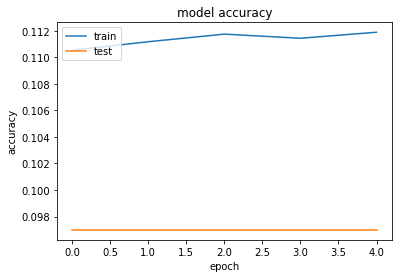

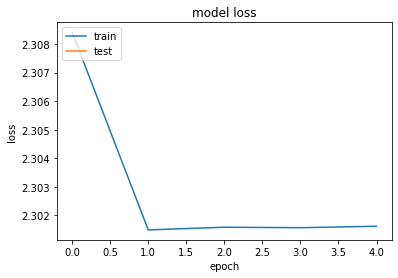

0.097
0.097


In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

print(history.history['val_accuracy'][-1])
print(np.max(history.history['val_accuracy']))